


# **House Price Prediction - Summary**

## **Project Overview**  
This project aims to predict house prices using a **Random Forest Regressor** model. The dataset includes various features such as the number of bedrooms, square footage, lot size, median income, property tax rate, and more. The goal is to build a machine learning model that can accurately estimate house prices based on these features.

---

## **Steps Taken**  

### **1. Data Loading and Preprocessing**  
- The dataset is loaded using `pandas`.  
- The **target variable** is `Price`, while all other columns serve as features.  
- The dataset is split into **training (80%)** and **testing (20%)** sets.  
- Numerical features are standardized using `StandardScaler()` to improve model performance.  

### **2. Model Training and Prediction**  
- A **Random Forest Regressor** model is trained on the preprocessed data.  
- The trained model makes predictions on the test set.  

### **3. Model Evaluation**  
The model's performance is evaluated using key metrics:  
- **Mean Absolute Error (MAE)** – Measures average prediction error.  
- **Root Mean Squared Error (RMSE)** – Measures how far predictions deviate from actual values.  
- **R-squared (R²) Score** – Measures how well the model explains the variability of house prices.  

### **4. Data Visualization**  
Several visualizations are included to analyze the results:  
- **Actual vs Predicted Prices** – A scatter plot comparing predicted prices with actual prices.  
- **Residual Plot** – Shows the distribution of prediction errors.  
- **Feature Importance** – Identifies which features contribute most to price prediction.  
- **Correlation Matrix** – Displays relationships between different features in the dataset.  

---

## **Conclusion**  
This project provides a data-driven approach to predicting house prices. The model, trained using a **Random Forest Regressor**, delivers reasonable predictions and insights into the most important factors affecting house prices. The visualizations help in understanding data relationships and model performance.  

---


In [11]:
# Step 1 import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
# Load the dataset and having a preview of the csv file
file_path = "house_prices_synthetic (1).csv"
df = pd.read_csv(file_path)
df.head()

,Bedrooms,Bathrooms,SquareFootage,LotSize,MedianIncome,PropertyTaxRate,ProximityCityCenter,YearBuilt,LastRenovationYear,InterestRate,DemandIndex,Price
0,4,1.6,799,0.62,56347,1.93,18,1980,1980,3.25,1.25,254036.40
1,5,1.9,638,0.67,128725,0.89,18,1959,1972,3.85,1.44,290828.33
2,3,3.6,858,0.89,133844,1.44,21,2005,2017,3.56,0.55,307291.91
3,5,2.0,2022,0.60,121321,1.45,26,2019,2040,5.45,0.51,450113.10
4,5,1.9,3956,0.65,79056,1.26,16,1969,1969,5.72,1.16,780451.24


In [20]:
# Define features and target variable
X = df.drop(columns=["Price"])  # Features
y = df["Price"]  # Target variable



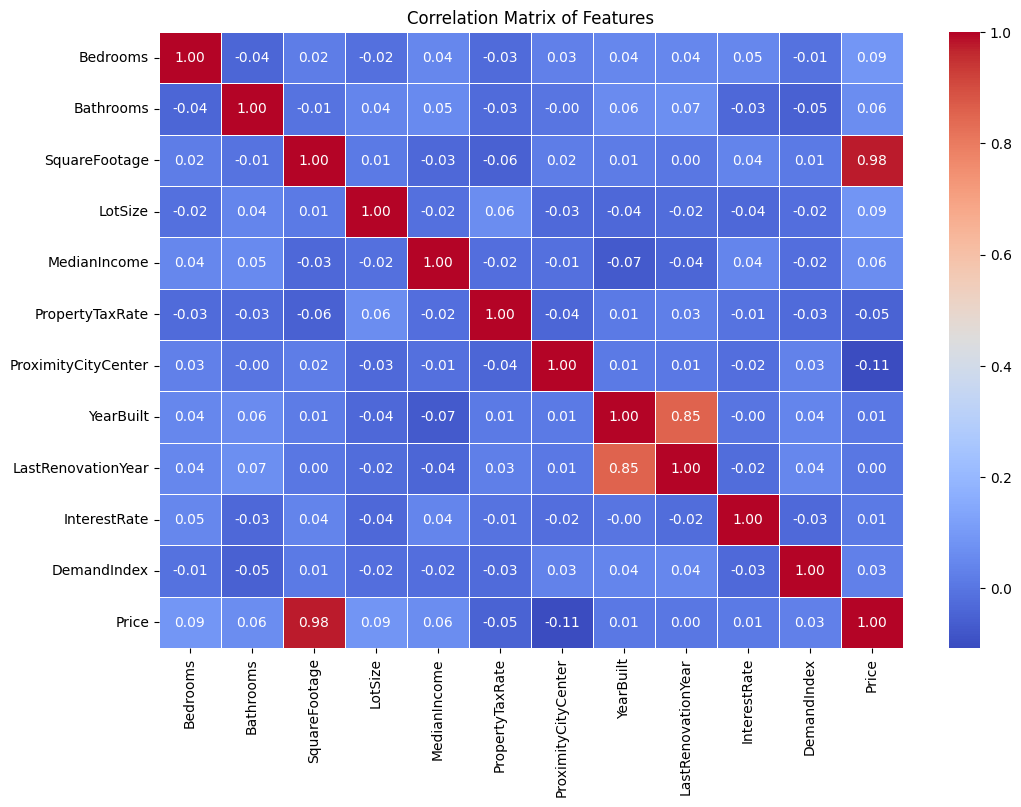

In [21]:
# Correlation Matrix
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

In [22]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [25]:

# Make predictions
y_pred = model.predict(X_test_scaled)


In [26]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Absolute Error: 21118.93
Root Mean Squared Error: 26162.66
R-squared Score: 0.98


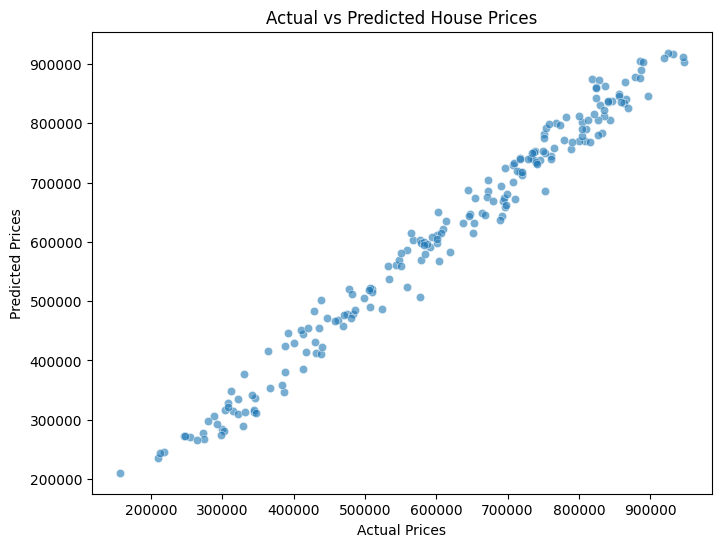

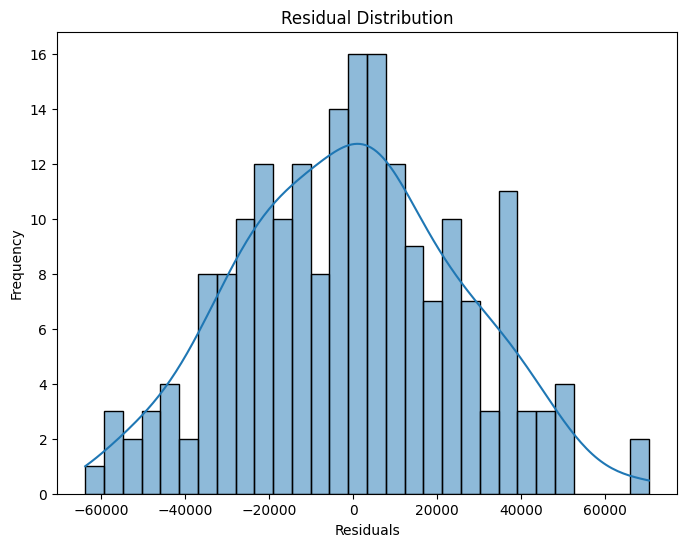

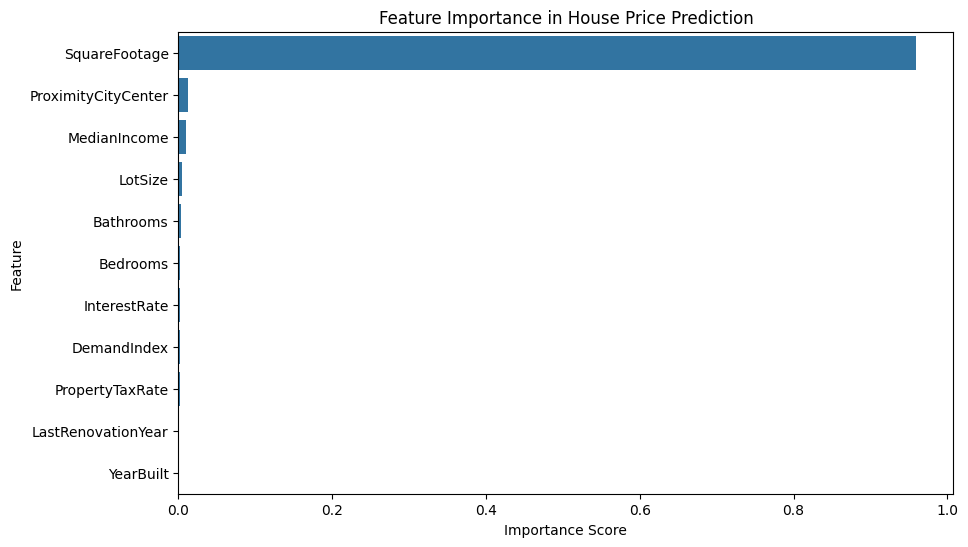

In [27]:
# Visualization - Actual vs Predicted Prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# Feature Importance
feature_importance = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in House Price Prediction")
plt.show()